# Customer Shopping Trends Data 
https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

In [630]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

## Breakdown of dataset
This data includes columns for : 
1. Customer ID 
2. Age
3. Gender 
4. Item Purchased
5. Category 
6. Purchase Amount (USD) 
7. Location 
8. Size 
9. Color 
10. Season 
11. Review Rating 
12. Subscription Status 
13. Shipping Type 
14. Discount Applied 
15. Promo Code Used 
16. Previous Purchases 
17. Payment Method 
18. Frequency Purchases 

For this analysis I will be examining these columns below along with a description regarding the columns : 

1. Age - Age of the customer
2. Gender - Gender of the customer (Male/Female)
3. Item Purchased - The item purchased by the customer
4. Category - Category of the item purchased
5. Purchase Amount (USD) - The amount of the purchase in USD
6. Review Rating - Rating given by the customer for the purchased item
7. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
8. Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
9. Payment Method - Customer's most preferred payment method
10. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)


## Data Cleaning

In [631]:
# Reading in the dataset
imported = pd.read_csv('/Users/junsik/Documents/Dickinson College/Spring 2024/DATA 300/Untitled Folder/shopping_trends_updated.csv')

# Define the column names that I want
columns = ['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)','Review Rating',
           'Discount Applied','Previous Purchases', 'Payment Method','Frequency of Purchases']

# Create a DataFrame with selected columns
df = pd.DataFrame(imported, columns=columns)

# Display the first 5 rows of the DataFrame
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,3.1,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,3.1,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,3.1,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,3.5,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,2.7,Yes,31,PayPal,Annually


## Data Exploration

In [632]:
# Basic dataset information
num_cols = ['Transaction-id','Age','Purchase Amount (USD)','Review Rating','Previous Purchases']
cat_cols = ['Gender','Item Purchased','Category','Discount Applied','Payment Method','Frequency of Purchases']
print(col_select_df[cat_cols].value_counts())
print(col_select_df.describe())

num_transactions = len(df)
num_unique_items = df['Item Purchased'].nunique()
item_frequencies = df['Item Purchased'].value_counts()
avg_transaction_length = df['Item Purchased'].count().mean()

print("Basic Dataset Information:")
print(f"Number of transactions: {num_transactions}")
print(f"Number of unique items: {num_unique_items}")
print(f"Average transaction length: {avg_transaction_length:.2f}")
print("\nItem Frequencies:")
print(item_frequencies)

Gender  Item Purchased  Category     Discount Applied  Payment Method  Frequency of Purchases
Female  Blouse          Clothing     No                Bank Transfer   Bi-Weekly                 7
        Pants           Clothing     No                Cash            Monthly                   6
        Handbag         Accessories  No                PayPal          Monthly                   6
        Jacket          Outerwear    No                Credit Card     Monthly                   6
Male    T-shirt         Clothing     Yes               Venmo           Every 3 Months            6
                                                                                                ..
        Coat            Outerwear    No                Bank Transfer   Fortnightly               1
                                                                       Every 3 Months            1
        Boots           Footwear     Yes               Venmo           Weekly                    1
               

## Association Rule Mining

### Apriori 

In [633]:
# Preprocessing: 
    # Selecting and handling categorical variables 
cat_cols = ['Gender','Item Purchased','Category','Discount Applied','Payment Method','Frequency of Purchases']
data_cat = df[cat_cols]
data_cat = data_cat.astype('category')

# Performing one-hot encoding
data_encoded = pd.get_dummies(data_cat)

# Apriori algorithm
frequent_itemsets_apriori = apriori(data_encoded, min_support=0.2, use_colnames=True)
frequent_itemsets_apriori_sorted = frequent_itemsets_apriori.sort_values(by='support', ascending=False)

# Generating association rule
association_rules_apriori = association_rules(frequent_itemsets_apriori_sorted, metric='confidence', min_threshold=0.2)

# Display association rule
association_rules_apriori

/Users/junsik/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Male),(Discount Applied_Yes),0.680000,0.430000,0.430000,0.632353,1.470588,0.137600,1.550400,1.000000
1,(Discount Applied_Yes),(Gender_Male),0.430000,0.680000,0.430000,1.000000,1.470588,0.137600,inf,0.561404
2,(Gender_Female),(Discount Applied_No),0.320000,0.570000,0.320000,1.000000,1.754386,0.137600,inf,0.632353
3,(Discount Applied_No),(Gender_Female),0.570000,0.320000,0.320000,0.561404,1.754386,0.137600,1.550400,1.000000
4,(Gender_Male),(Category_Clothing),0.680000,0.445385,0.302821,0.445324,0.999865,-0.000041,0.999891,-0.000423
5,(Category_Clothing),(Gender_Male),0.445385,0.680000,0.302821,0.679908,0.999865,-0.000041,0.999712,-0.000244
6,(Category_Clothing),(Discount Applied_No),0.445385,0.570000,0.257949,0.579159,1.016069,0.004079,1.021765,0.028515
7,(Discount Applied_No),(Category_Clothing),0.570000,0.445385,0.257949,0.452542,1.016069,0.004079,1.013073,0.036779
8,(Gender_Male),(Discount Applied_No),0.680000,0.570000,0.250000,0.367647,0.644995,-0.137600,0.680000,-0.632353
9,(Discount Applied_No),(Gender_Male),0.570000,0.680000,0.250000,0.438596,0.644995,-0.137600,0.570000,-0.561404


Based on the Apriori association rules presented above we can find several interesting patterns emerge regarding the purchasing behaviors in this dataset. The most prominent one is that male customers are more likely to make a purchase when there is a discount applied to them rather than not. Additionally female customers seems to be indifferent towards whether or not there is a discount associated with the purchase. Sellers could take this into account and create gender targeted promotion strategies. Another interesting rule that is found is that while male customers are more likely to purchase clothing items over accessories female customers don't seem to have that strong of a preference regarding which they purchase. I think this could be explained due to the fact that females often purchase more accessories compared to males and hence the indifferences shown in the female customers. Using these insights I believe companies should be creating gender targeted promotions and advertisement as different genders seem to behave differently according to the apriori association rule mining. 

### FP Growth 

In [634]:
# FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(data_encoded, min_support=0.2, use_colnames=True)

# Generating association rule
association_rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.2)

# Displaying association rules
association_rules_fp

/Users/junsik/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Male),(Category_Clothing),0.680000,0.445385,0.302821,0.445324,0.999865,-0.000041,0.999891,-0.000423
1,(Category_Clothing),(Gender_Male),0.445385,0.680000,0.302821,0.679908,0.999865,-0.000041,0.999712,-0.000244
2,(Category_Clothing),(Discount Applied_No),0.445385,0.570000,0.257949,0.579159,1.016069,0.004079,1.021765,0.028515
3,(Discount Applied_No),(Category_Clothing),0.570000,0.445385,0.257949,0.452542,1.016069,0.004079,1.013073,0.036779
4,(Gender_Male),(Discount Applied_Yes),0.680000,0.430000,0.430000,0.632353,1.470588,0.137600,1.550400,1.000000
5,(Discount Applied_Yes),(Gender_Male),0.430000,0.680000,0.430000,1.000000,1.470588,0.137600,inf,0.561404
6,(Category_Accessories),(Gender_Male),0.317949,0.680000,0.217436,0.683871,1.005693,0.001231,1.012245,0.008299
7,(Gender_Male),(Category_Accessories),0.680000,0.317949,0.217436,0.319759,1.005693,0.001231,1.002661,0.017689
8,(Gender_Male),(Discount Applied_No),0.680000,0.570000,0.250000,0.367647,0.644995,-0.137600,0.680000,-0.632353
9,(Discount Applied_No),(Gender_Male),0.570000,0.680000,0.250000,0.438596,0.644995,-0.137600,0.570000,-0.561404


The FP Growth association rule mining confirms some of the findings that were found in the Apriori association rule mining. Some of those findings include the patterns in terms of the gender preferences for discounts. Both rules state that male are more likely to purchase clothing, especially when discounts are applied, while females are more likely to make the purchase regardless of a discount. However, the FP Growth method shows that males are more likely to purchase accessories compared to females. The scan of frequent items list idenfied a different pattern compared to the Apriori method. Overall the FP Growth method supports the findings of the Apriori method in having a gender targeted marketing / promotion strategy. 

### ECLAT

In [635]:
# Defining columns I want
columns = ['Age', 'Gender', 'Item Purchased', 'Category', 'Discount Applied', 'Payment Method','Frequency of Purchases']

# Create a DataFrame with selected columns
ECLATdf = pd.DataFrame(imported, columns=columns)
attrCount = len(dataFrame.count())
i = 0
for col in dataFrame.columns[:attrCount].tolist():
    dataFrame.rename(columns={col : i}, inplace=True)
    i += 1

eclat_instance = ECLAT(dataFrame, verbose=True)

100%|███████████████████████████████████| 3969/3969 [00:00<00:00, 8012.29it/s]


In [636]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.08,
                                                           min_combination=1,
                                                           max_combination=3,
                                                           separator=' & ',
                                                           verbose=True)


Combination 1 by 1


21it [00:02,  7.52it/s]


Combination 2 by 2


210it [00:15, 13.80it/s]


Combination 3 by 3


1330it [01:20, 16.51it/s]


In [637]:
get_ECLAT_supports
sorted_ECLAT_supports = pd.DataFrame(sorted(get_ECLAT_supports.items(), key=lambda x: x[1], reverse=True))
columns = ['Item(s)','Support']
sorted_ECLAT_supports.columns = columns
sorted_ECLAT_supports.head(50)

,Item(s),Support
0,Male,0.680000
1,No,0.570000
2,Clothing,0.445385
3,Yes,0.430000
4,Yes & Male,0.430000
5,Female,0.320000
6,No & Female,0.320000
7,Accessories,0.317949
8,Male & Clothing,0.302821
9,No & Clothing,0.257949


The ECLAT method also shows several interesting findings compared to the FP Growth and Apriori methods that were explored above. It shows that male are significantly inclined to purchase clothing, accounting for approximately 30% of all purchases. This could potentially mean that a marketing campaign targeting men for clothing could be beneficial. Additionally it shows strong preferences amongst customers to use paypal, credit card, and cash for their payment methods. Stores could potentially benefit from using these 

## Classification

In [638]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,3.1,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,3.1,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,3.1,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,3.5,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,2.7,Yes,31,PayPal,Annually


### ZeroR 

In [639]:
zeroR_prediction = df['Category'].mode()[0]
print("ZeroR prediction:", zeroR_prediction)

ZeroR prediction: Clothing


The ZeroR classification seems to show that Clothing is the most common amongst the target variable of Category. 

### OneR

In [640]:
oneR_summary = {}
for col in df.columns:
    if col != 'Category':
        summary = df.groupby([col, 'Category']).size().unstack(fill_value=0)
        total_counts = summary.sum(axis=1)
        best_predictor = total_counts.idxmax()
        oneR_summary[col] = best_predictor

print("OneR summary:\n")
print(oneR_summary)

OneR summary:

{'Age': 69, 'Gender': 'Male', 'Item Purchased': 'Blouse', 'Purchase Amount (USD)': 32, 'Review Rating': 3.4, 'Discount Applied': 'No', 'Previous Purchases': 31, 'Payment Method': 'PayPal', 'Frequency of Purchases': 'Every 3 Months'}


The OneR Classification has several interesting findings. We can tell that male are more likely to purchase clothing compared to the females, the predominant payment method seems to be PayPal as well as the age of 69 being the best predictor for the Category variable. 

### K means

In [641]:
# Copying main df
temp_df = df.copy()

# Preprocessing
# Converting 'Age' into age ranges
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = [f"{i}-{i+4}" for i in range(15, 96, 5)]
temp_df['Age Range'] = pd.cut(temp_df['Age'], bins=bins, labels=labels, right=False)

# One-hot encoding 'Age Range'
onehot_encoder = OneHotEncoder(sparse=False)
age_range_encoded = onehot_encoder.fit_transform(temp_df[['Age Range']])
age_range_encoded_df = pd.DataFrame(age_range_encoded, columns=onehot_encoder.get_feature_names_out(['Age Range']))
temp_df = pd.concat([temp_df, age_range_encoded_df], axis=1)

# Checking that 'Purchase Amount (USD)' and 'Review Rating' are numeric
temp_df['Purchase Amount (USD)'] = pd.to_numeric(temp_df['Purchase Amount (USD)'], errors='coerce')
temp_df['Review Rating'] = pd.to_numeric(temp_df['Review Rating'], errors='coerce')

# Splitting the data
X = temp_df[['Purchase Amount (USD)', 'Review Rating'] + list(age_range_encoded_df.columns)]
y = temp_df['Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Predicting the categories for the test set
y_pred = knn.predict(X_test)

# Evaluation of the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Accessories       0.28      0.37      0.32       367
    Clothing       0.43      0.51      0.47       524
    Footwear       0.12      0.04      0.06       185
   Outerwear       0.00      0.00      0.00        94

    accuracy                           0.35      1170
   macro avg       0.21      0.23      0.21      1170
weighted avg       0.30      0.35      0.32      1170



/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(Only variables that had numeric values were selected for the classification models for kmeans and decision tree modeling) 

From the f1-scores we can see how the age, purchase amount and reviews were only able to predict the clothing within the Category variable well with a f1-score of .47. Others such as Outerwear received a score of 0 making it seem like there are no predictive powers for it at all. However, the overall low score amongst all the categories we can see that the age of the customer, how much they spent, and their review ratings hold very little power. 

### Decision TREE

In [642]:
# Selecting relevant features for classification
X = df[['Age', 'Purchase Amount (USD)', 'Review Rating']]
y = df['Category']

# Encoding categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = decision_tree.predict(X_test)

# Converting predicted labels back to original labels
y_pred_classes = label_encoder.inverse_transform(y_pred)

# Converting y_test back to original labels
y_test_classes = label_encoder.inverse_transform(y_test)

# Evaluation of the model's performance
print("Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))

Classification Report:

              precision    recall  f1-score   support

 Accessories       0.31      0.29      0.30       249
    Clothing       0.44      0.46      0.45       346
    Footwear       0.15      0.15      0.15       122
   Outerwear       0.10      0.10      0.10        63

    accuracy                           0.33       780
   macro avg       0.25      0.25      0.25       780
weighted avg       0.33      0.33      0.33       780



Again even for the decision tree classification the age, purchase amount and review rating was able to predict the Clothing within the Category variable the best. However, in contrast it was able to get a higher f score for the rest as well showing that the decision tree classification is a better classification model for this particular dataset. 

## Regression 

### Decision Tree Regression 

In [643]:
# Copying main df
DTregression_df = df.copy()

# Defining target_df to only contain the 'Category' column
target_df = DTregression_df[['Category']]

# Dropping the 'Frequency of Purchases' column from the feature DataFrame
DTregression_df.drop(columns=['Frequency of Purchases'], inplace=True)

# One-hot encode categorical variables
categorical_cols = DTregression_df.select_dtypes(include=['object']).columns
DTregression_df = pd.get_dummies(DTregression_df, columns=categorical_cols)

# Dropping Category_ columns in DTregression_df
columns_to_drop = [col for col in df.columns if col.startswith('Category_')]
X = DTregression_df.drop(columns=columns_to_drop, axis=1)  
y = target_df['Category']

# One-hot encode the target variable y
y_encoded = pd.get_dummies(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5,random_state=42)

# Training the model
decision_tree_regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = decision_tree_regressor.predict(X_test)

# Evaluation of the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In this decision tree regression it checks for Age, Gender, Item Purchased, Purchase Amount Review Rating, Discount Applied, Previous Purchases and Payment methods against the target variable, Category. The MSE of 0.0 could be a result from too many characterisitics trying to predict one variable. Category doesn't have that much variation within the characteristic. Once the one hot encoding are completed for the categorical variables there was 44 columns that was trying to predict one variable that only had 4 variation within the variable. Hence a MSE of 0.0 could have been achieved but since a MSE of 0.0 has been achieved we could also say that there isn't much significant regression that could have come from this regression model. 

In [644]:
# Copying main df
DTregression_df1 = df.copy()

# Defining target_df to only contain the 'Category' column
target_df = DTregression_df1[['Category']]
    # target_df shows up fine with just the 'Category' column 

# Dropping the 'Frequency of Purchases' column from the feature DataFrame
DTregression_df1.drop(columns=['Frequency of Purchases'], inplace=True)

# One-hot encode categorical variables
categorical_cols = DTregression_df1.select_dtypes(include=['object']).columns
DTregression_df1 = pd.get_dummies(DTregression_df1, columns=categorical_cols)

# Get a list of columns to keep
columns_to_keep = ['Age_', 'Gender_', 'Purchase Amount', 'Discount Applied_']

# Drop the columns that start with 'Category_' and keep the specified columns
X = DTregression_df1.drop(columns=[col for col in regression_df.columns if col.startswith('Category_') and col not in columns_to_keep], axis=1)
y = target_df['Category']

# One-hot encode the target variable y
y_encoded = pd.get_dummies(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5,random_state=42)

# Training the model
decision_tree_regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = decision_tree_regressor.predict(X_test)

# Evaluation of the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.10934479168863671


To fix this I dropped some of the characteristics and only kept the ones that showed some significance in the previous codes and ended up with a MSE of 0.019. This proves that there was too many characteristics to make the regression model viable as there was 44 characteristics to predict one variable that has less than 5 variations within that variable. I recognize that the MSE doesn't mean that much in this case as the target variable is a categorical variable compared to a continuous variable. However, keeping all the target and predictor variables the same, I am hoping to see which model has the smallest MSE hence, the best model of regression for this dataset. 

### Linear Regression

In [645]:
linregression_df = df.copy()

# Defining predictor and target variables 
X = linregression_df[['Age', 'Gender', 'Purchase Amount (USD)', 'Discount Applied']]
y = target_df['Category']

# One-hot encode categorical variables in predictor and target variables
X_encoded = pd.get_dummies(X, columns=['Age', 'Gender', 'Purchase Amount (USD)', 'Discount Applied'])
y_encoded = pd.get_dummies(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_regressor = LinearRegression()

# Training the model
linear_regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = linear_regressor.predict(X_test)

# Evaluation of the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1765094505670743


Using a linear regression model I came out with a MSE of 0.1765 which is higher than the Decision Tree Regression model. Again I awknowledge the shortcomings of using a categorical variable for both the target and predictor variable as this doesn't necessarily mean that the results are accurate. However, it is interesting to note that the Decision Tree Regression had a lower MSE compared to the Linear Regression model. 

### K Nearest Neighbor Regression 

In [646]:
KNNregression_df = df.copy()

# Defining predictor and target variables 
X = KNNregression_df[['Age', 'Gender', 'Purchase Amount (USD)', 'Discount Applied']]
y = target_df['Category']

# One-hot encode categorical variables in predictor and target variables
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initializing the K Nearest Neighbors Regression model
knn_regressor = KNeighborsRegressor()

# Training the model
knn_regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = knn_regressor.predict(X_test)

# Evaluation of the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.20484615384615376


For the K Nearest Neighbor regression we can observe an MSE of 0.2048. This is the highest MSE that has been observed amongst the three and we could conclude that this is the worst model for this dataset. 

Overall Regression Interpretation 

The lowest MSE was observed from Decision tree regression when keeping all else the same. As a result, we could conclude that the Decision Tree regression model is the most appropriate for predicting the Category variable using Age, Gener, Purchase Amount (USD), and Discount Applied as the predictor variables. 

## Clustering 

### K means Clustering

/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

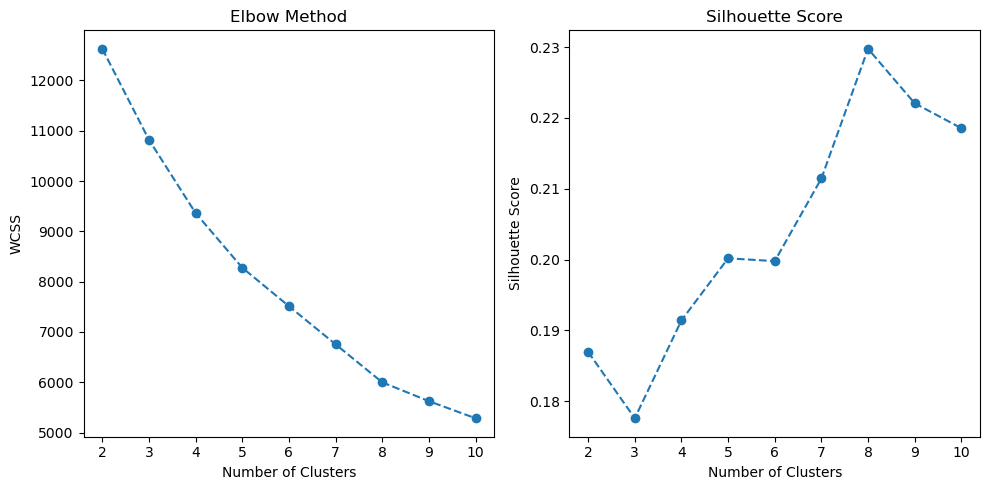

In [647]:
KMClusterdf = df.copy()

# Select numerical features for clustering
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(KMClusterdf[features])

# Calculating WCSS for different values of k
wcss = []
silhouette_scores = []

max_k = 10  
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) 
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the elbow plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

From the Elbow method and silhouette score we can tell that 8 clusters is the optimal amount of cluster hence we will calculate using 8 clusters. 

In [648]:
KMClusterdf = df.copy()

# StandardizING the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(KMClusterdf[features])

# ApplyING k-means clustering
k = 8  
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyzing the results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df['Cluster'].value_counts() 

# Calculating cluster centers in original scale
cluster_centers_orig_scale = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a DataFrame to store cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_orig_scale, columns=features)

# Adding cluster labels
cluster_centers_df['Cluster'] = range(k)

# Displaying cluster centers
print("Cluster Centers:")
print(cluster_centers_df)

# Characteristics of each cluster with respect to the median age
median_ages = []
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    median_age = cluster_data['Age'].median()
    median_ages.append((i, median_age))

# Sorting clusters based on median age
median_ages.sort(key=lambda x: x[1])

# Characteristics of each cluster with respect to the median age
for i, median_age in median_ages:
    print(f"\nCluster {i} characteristics (with respect to median age {median_age}):")
    cluster_data = df[df['Cluster'] == i]
    print(cluster_data[features].median())

/Users/junsik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
         Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0  32.925403              43.604839       3.160887           36.629032   
1  57.296380              80.509050       3.297059           37.341629   
2  32.036093              78.496815       4.359448           37.097665   
3  31.848837              39.967054       4.273643           13.998062   
4  56.701613              41.334677       3.145968           16.151210   
5  54.632000              79.050000       4.306600           14.120000   
6  56.256250              40.168750       4.257500           36.670833   
7  32.555110              78.086172       3.174148           13.685371   

   Cluster  
0        0  
1        1  
2        2  
3        3  
4        4  
5        5  
6        6  
7        7  

Cluster 2 characteristics (with respect to median age 31.0):
Age                      31.0
Purchase Amount (USD)    81.0
Review Rating             4.4
Previous Purchases       38.0
dtype: float64

C

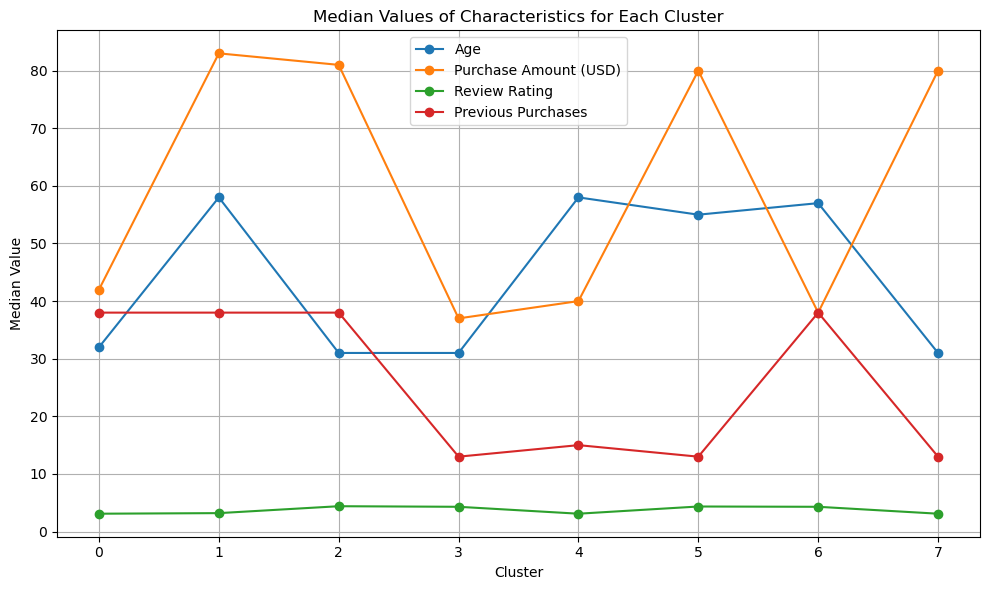

In [649]:
# Plotting the clusters
plt.figure(figsize=(10, 6))

# Iterate over each feature and plot
for feature in features:
    # Get the median values for each feature in each cluster
    median_values = []
    for i in range(k):
        cluster_data = df[df['Cluster'] == i]
        median_value = cluster_data[feature].median()
        median_values.append(median_value)

    # Plot the median values for each cluster
    plt.plot(range(k), median_values, marker='o', label=feature)

plt.xlabel('Cluster')
plt.ylabel('Median Value')
plt.title('Median Values of Characteristics for Each Cluster')
plt.xticks(range(k))
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

(Only variables with numerical values were used in the clustering methods) 

Only notable relationship that is observable is that the previous purchases has somewhat of the same relationship of how much they purchased the next time. From this we could come to the conclusion of having targeted marketing made for each purchase level group. If they purchased a lot before we could target them towards higher ticket items as they are more likely to make the purchase and spend more compared to people that didn't purchase that much prior. 

### Nearest Neighbor Clustering

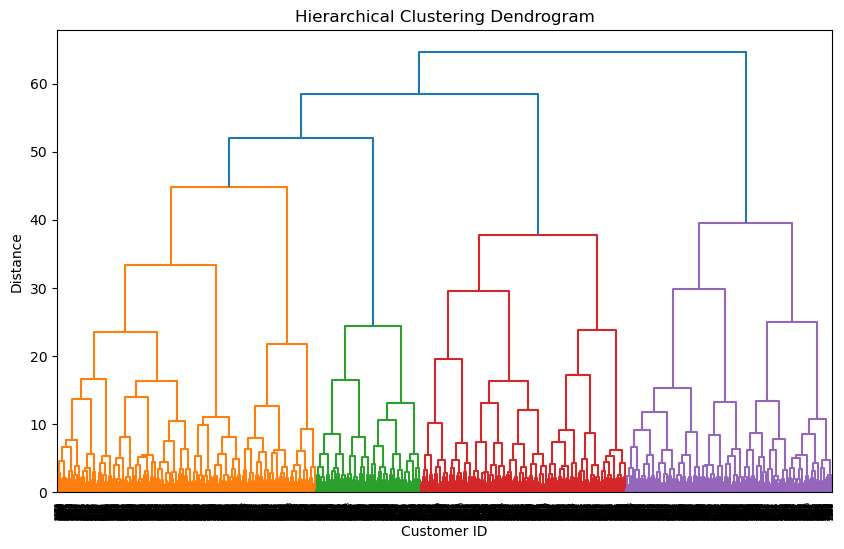

In [650]:
NNC_df = df.copy()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(NNC_df[features])

# Hierarchical clustering
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
plt.show()

In [651]:
# Cut the dendrogram to obtain 4 clusters
num_clusters = 4  
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Adding labels to the DataFrame
df['Cluster'] = clusters

# Characteristics of each cluster 
for cluster_id in range(1, num_clusters + 1):
    print(f"\nCluster {cluster_id} characteristics (mean values):")
    cluster_data = df[df['Cluster'] == cluster_id]
    print(cluster_data[features].mean())


Cluster 1 characteristics (mean values):
Age                      58.111004
Purchase Amount (USD)    58.083977
Review Rating             3.761583
Previous Purchases       36.739382
dtype: float64

Cluster 2 characteristics (mean values):
Age                      41.362669
Purchase Amount (USD)    38.165377
Review Rating             3.747485
Previous Purchases       15.573501
dtype: float64

Cluster 3 characteristics (mean values):
Age                      31.195817
Purchase Amount (USD)    60.408745
Review Rating             3.099810
Previous Purchases       35.283270
dtype: float64

Cluster 4 characteristics (mean values):
Age                      40.250000
Purchase Amount (USD)    77.966258
Review Rating             4.004908
Previous Purchases       20.051380
dtype: float64


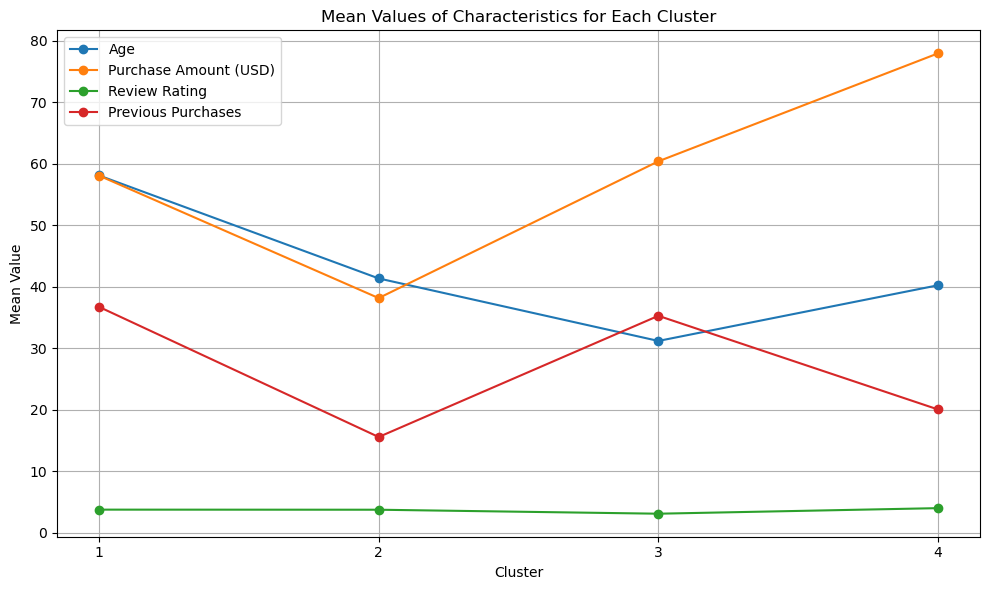

In [652]:
plt.figure(figsize=(10, 6))

# Iterate over each feature and plot the mean value for each cluster
for feature in features:
    means = []
    for cluster_id in range(1, num_clusters + 1):
        cluster_data = df[df['Cluster'] == cluster_id]
        mean_value = cluster_data[feature].mean()
        means.append(mean_value)

    # Plot the means for each cluster
    plt.plot(range(1, num_clusters + 1), means, marker='o', label=feature)

plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Each Cluster')
plt.xticks(range(1, num_clusters + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The same trend can be observed in the KNN clustering as it shows that the previous purchase amount is the only thing that is remotely related to how much a customer would purchase hence my conclusion in the previous clustering method still holds. 

### DBSCAN Clustering 

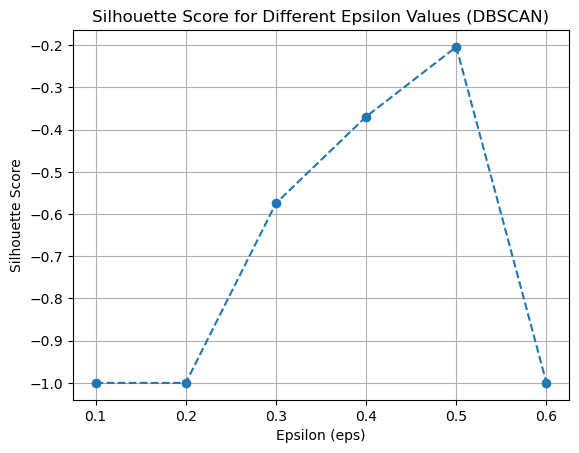

In [653]:
DBdf = df.copy()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(DBdf[features])

# Calculate silhouette scores for different values of eps
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    clusters = dbscan.fit_predict(df_scaled)
    if len(set(clusters)) > 1:  
        silhouette_scores.append(silhouette_score(df_scaled, clusters))
    else:
        silhouette_scores.append(-1) 

plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Epsilon Values (DBSCAN)')
plt.grid(True)
plt.show()

In [654]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(DBdf[features])

# Perform DBSCAN clustering with eps=0.5
dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(df_scaled)

# Add labels to the DataFrame
DBdf['Cluster'] = clusters

print(DBdf['Cluster'].value_counts())

 0    3824
-1      60
 4       5
 1       4
 2       4
 3       3
Name: Cluster, dtype: int64


From this, although we have utilized the most optimal eps of 0.5 that is shown in the silhouette score above, we can see that almost all the points are in cluster 0. 

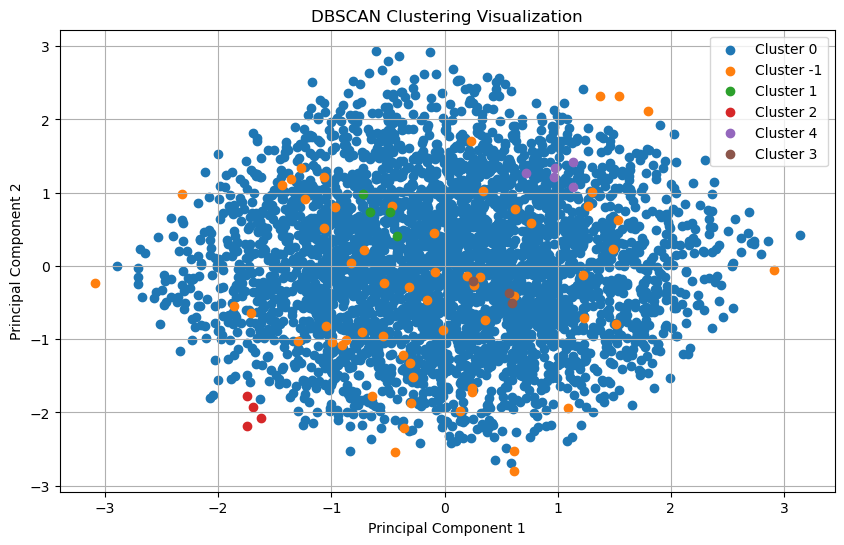

In [656]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = DBdf['Cluster']

plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()